In [1]:
# ranking results: linear regression works very well on young and almost well in VI failure. but better to
  #try other regression problems

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import Dataset.txt to cvs. remove the header, the first line. now importing to pandas
# defining the name of headers
data_cols=['WR','AR','w','h', 't1','t2','sh','Em','VM', 'TR', 'Young', 'EL1', 'Max_Pri_S', 'EL2', 'Max_S_HI' , 'EL3', 'Max_S_VI']
df = pd.read_csv('ALLX.csv', names=data_cols, header=0)
# drop redundent columns or series
df.drop(['WR','w', 'h','t1', 't2','EL2', 'EL3'],axis=1, inplace=True)
#delet the negative rows by a for loop or preprocessing data
df = df[(df['Max_S_HI'] >= 0) & (df['Max_S_VI'] >= 0) & (df['Young'] >= 0) & (df['TR'] <= 2)&  (df['TR'] >= -2)& (df['Max_Pri_S'] >= 0)]
df = df[ (df['Max_Pri_S'] < 2) & (df['Max_S_HI'] < 2) & (df['Max_S_VI'] < 2) & (df['Young'] < 2)]
# drop dublicate rows
df = df.drop_duplicates()
# define the element number in brick
brick = [11,  12,  13,  14,  15,  16,  17,  18,  24,  25,  26,  27,  32,  33,  34,  35, 36,  37,  38,  39,  51,  52,  53,  54,  55,  56,  57,  58,  63,  64,  65,  66, 67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
# check if the brick fails by comparing the element number of max stress with brick elements numbers
Bfailure = df.EL1.isin(brick)
df['Bfailure']=Bfailure
#df = df[df.Bfailure]
#df.drop(['EL1'],axis=1, inplace=True)
# df.drop(['Bfailure'],axis=1, inplace=True)
# metal
df = df[ (df['Em'] == 0.5)]
# metal check if the sequence is correct First vertical interface faile, then horizental interface, and then brick
# VI fails first
FailSeq1 = ((df.Max_S_VI/df.Max_S_HI)>1) & ((df.Max_Pri_S/df.Max_S_VI)<2) & (Bfailure)
#brick fails first
Brick_first1 = ((df.Max_Pri_S/df.Max_S_HI)>2) & ((df.Max_Pri_S/df.Max_S_VI)>2) & (Bfailure)
# HI fails first
HI_first1 = ((df.Max_S_HI/df.Max_S_VI)>1) & ((df.Max_Pri_S/df.Max_S_HI)<2) & (Bfailure)
# check if the maximum stress in the composite happens in VI or HI
brick = [11,  12,  13,  14,  15,  16,  17,  18,  24,  25,  26,  27,  32,  33,  34,  35, 36,  37,  38,  39,  51,  52,  53,  54,  55,  56,  57,  58,  63,  64,  65,  66, 67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
HI = [1,   6,   7,   8,   9,  10,  19,  20,  21,  22,  23,  28,  29,  30,  31,  40, 41,  42,  43,  44,  49,  50,  59,  60,  61,  62,  83,  84,  85,  86,  87,  88, 89,  90,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
VI = [2,  3,  4,  5, 45, 46, 47, 48, 91, 92, 93, 94, 95, 96, 97, 98]
VI_first = df.EL1.isin(VI)
HI_first = df.EL1.isin(HI)
FailSeq = (VI_first) | (FailSeq1)
HI_first = (HI_first) | (HI_first1)
df['FailSeq']=FailSeq
df['Brick_first']=Brick_first1
df['HI_first']=HI_first


df['FailSeq']=(df['FailSeq'] == True).astype(int)
df['Brick_first']=(df['Brick_first'] == True).astype(int)
df['HI_first']=(df['HI_first'] == True).astype(int)

#check the portion
#df.FailSeq.value_counts(normalize=True)
#df.Brick_first.value_counts(normalize=True)
#df.HI_first.value_counts(normalize=True)

# normilizing Max_S_VI to its minimum value (remember first normalize so min number becomes 1)
dfb = df[ (df['FailSeq'] == 1)]
df.Max_S_VI = df.Max_S_VI.divide(dfb.Max_S_VI.min())
# now inverse Max stress in vertical interface to get the strength (remember first normalize so min number becomes 1)
# for the same load, higher stress in VI means less strength, therefore strength=1/generated_stress
#df.Max_S_VI = (1/df.Max_S_VI)
#dfb = df[ (df['FailSeq'] == 1)]
#df.Max_S_VI = df.Max_S_VI.divide(dfb.Max_S_VI.min())

#
df.head()

ModuleNotFoundError: No module named 'pandas'

In [2]:
dfb = df[ (df['FailSeq'] == 1)].copy()
dfb.Max_S_VI.min()

1.0

In [3]:
df.FailSeq.value_counts(normalize=True)

1    0.746513
0    0.253487
Name: FailSeq, dtype: float64

# Training, validation, and test data set

,AR,sh,VM,TR,Max_S_VI
30274,32.1349,0.45027,0.4,1.968140,0.939545
56137,5.0000,0.40000,0.8,-0.387216,1.766102
48704,8.0000,0.10000,0.3,1.913814,1.282486
59967,14.0000,0.40000,0.4,-2.000000,1.392791
58291,10.0000,0.30000,0.6,-0.292430,1.622092


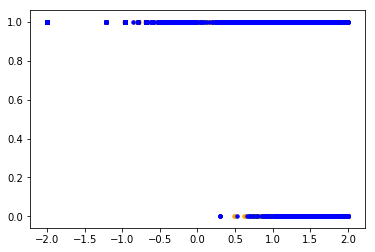

In [4]:
# ********************************
# Machine learning
# Specifying the features and Target

# before creating ML feature, we have to create a more complete data frame, 
#so after training we could compare and rank the FE results and ML results
feature_cols1=['AR', 'sh', 'VM', 'TR', 'Max_S_VI']
X_trn1 = df.loc[:,feature_cols1].copy()  #used for regression
y_trn = df. FailSeq.copy()

y_trn = df. FailSeq.copy()

# scikit-learn has many tools and utilities for model selection
from sklearn.model_selection import train_test_split
tst_frac = 0.3  # Fraction of examples to sample for the test set
val_frac = 0.1  # Fraction of examples to sample for the validation set

# First, we use train_test_split to partition (X, y) into training and test sets
X_trn1, X_tst1, y_trn, y_tst = train_test_split(X_trn1, y_trn, test_size=tst_frac, random_state=42)

# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn1, X_val1, y_trn, y_val = train_test_split(X_trn1, y_trn, test_size=val_frac, random_state=42)


# removing extra column from X_trn to make the feature for ML
feature_cols=['AR', 'TR']
X_trn = X_trn1.loc[:,feature_cols].copy()
X_val = X_val1.loc[:,feature_cols].copy()
X_tst = X_tst1.loc[:,feature_cols].copy()
# Plot the three subsets
plt.figure()
plt.scatter(X_trn1.TR, y_trn, 12, marker='o', color='orange')
plt.scatter(X_val1.TR, y_val, 12, marker='o', color='green')
plt.scatter(X_tst1.TR, y_tst, 12, marker='o', color='blue')
X_trn1.head()

In [5]:
df.shape

(30972, 14)

Learning a decision tree with d = 1.
Learning a decision tree with d = 2.
Learning a decision tree with d = 3.
Learning a decision tree with d = 4.
Learning a decision tree with d = 5.
Learning a decision tree with d = 6.
Learning a decision tree with d = 7.

No handles with labels found to put in legend.



Learning a decision tree with d = 8.
Learning a decision tree with d = 9.
Learning a decision tree with d = 10.
Learning a decision tree with d = 11.


Text(0, 0.5, 'AUC')

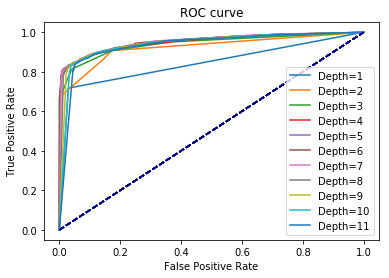

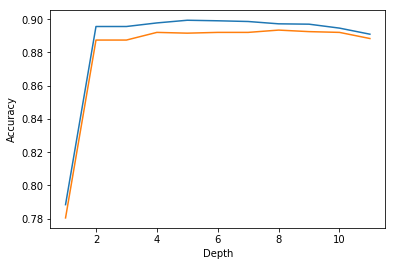

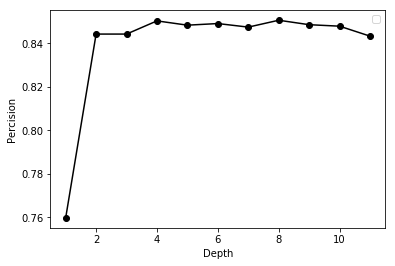

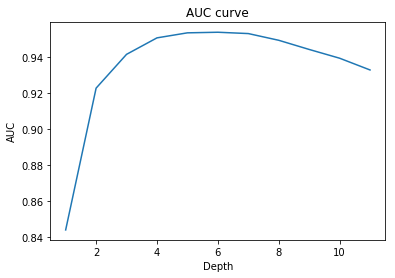

In [6]:
# Learn decision trees with different depths
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score


d_values = np.arange(1, 12, dtype='int')
models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()
percision_v = dict()
percision_t = dict()


for d in d_values:
    models[d] = DecisionTreeClassifier(max_depth = d, min_samples_split=2, min_samples_leaf=0.0001)
    models[d].fit(X_trn,y_trn)
    y_trn_predicted = models[d].predict(X_trn)
    y_val_predicted = models[d].predict(X_val)
    y_tst_predicted = models[d].predict(X_tst)
    tst_score[d] = models[d].score(X_tst,y_tst)
    va_score[d] = models[d].score(X_val,y_val)
    percision_v [d] = precision_score(y_val, y_val_predicted, average='macro')  
    percision_t [d] = precision_score(y_tst, y_tst_predicted, average='macro')  

    
    # INSERT YOUR CODE HERE

    y_score = dict()
    fpr = dict() #false positive rate, horizental axis in ROC curve
    tpr = dict() #true positive rate, vertical axis in ROC curve
    y_score = models[d].predict_proba(X_val)
    fpr, tpr, _ = roc_curve(y_val, y_score[:,1])
    roc_auc[d] = auc(fpr, tpr)
    plt.plot(fpr,tpr,label='Depth='+str(d) )
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend()
    
    

    print('Learning a decision tree with d = {0}.'.format(d))
# score plot
plt.figure()
plt.plot(d_values,tst_score.values(), label = 'Accuracy for Test data')
plt.plot(d_values,va_score.values(), label = 'Accuracy for validation data')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
# percision
plt.figure()
plt.legend()
plt.plot(d_values,percision_v.values(),  '-ko', label = 'percision for validation data', )
plt.xlabel('Depth')
plt.ylabel('Percision')
# auc plot
plt.figure()
plt.title('AUC curve')
plt.plot(d_values,roc_auc.values(), label = 'Score for validation data')
plt.xlabel('Depth')
plt.ylabel('AUC')

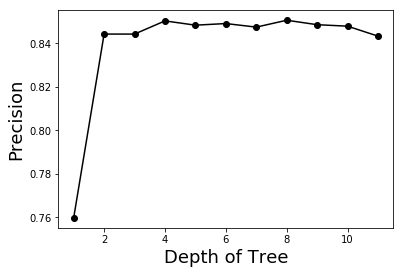

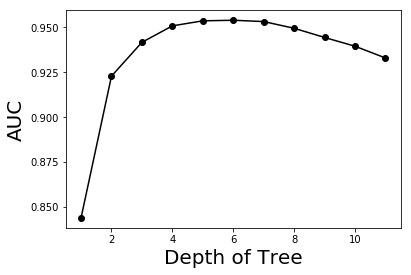

In [7]:
# Percision plot
plt.figure()
plt.xlabel('Depth of Tree', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.plot(d_values,percision_v.values(),  '-ko', label = 'percision for validation data', )
#AUC
plt.figure()
plt.xlabel('Depth of Tree', fontsize=20)
plt.ylabel('AUC', fontsize=20)
plt.plot(d_values,roc_auc.values(),  '-ko', label = 'percision for validation data', )


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)


array([0.0001    , 0.00213878, 0.00417755, 0.00621633, 0.0082551 ,
       0.01029388, 0.01233265, 0.01437143, 0.0164102 , 0.01844898,
       0.02048776, 0.02252653, 0.02456531, 0.02660408, 0.02864286,
       0.03068163, 0.03272041, 0.03475918, 0.03679796, 0.03883673,
       0.04087551, 0.04291429, 0.04495306, 0.04699184, 0.04903061,
       0.05106939, 0.05310816, 0.05514694, 0.05718571, 0.05922449,
       0.06126327, 0.06330204, 0.06534082, 0.06737959, 0.06941837,
       0.07145714, 0.07349592, 0.07553469, 0.07757347, 0.07961224,
       0.08165102, 0.0836898 , 0.08572857, 0.08776735, 0.08980612,
       0.0918449 , 0.09388367, 0.09592245, 0.09796122, 0.1       ])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


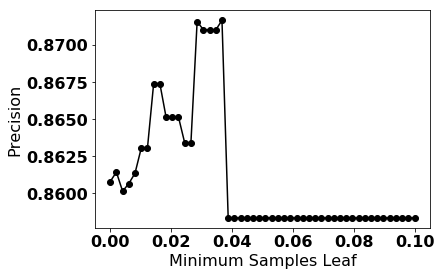

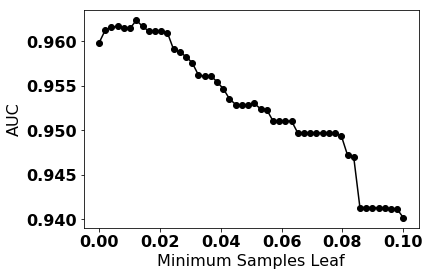

In [8]:
# ignore this hyper parameter

# between 2 and 10
#min_samples_splits = np.linspace(2, 10, 9, endpoint=True)
#min_samples_splits=min_samples_splits.astype(int)

# 
min_samples_leafs = np.linspace(0.0001, 0.1, 50, endpoint=True)
min_samples_splits = min_samples_leafs


d_values = min_samples_splits
models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()
percision_v = dict()
percision_t = dict()


for d in min_samples_splits:
    models[d] = DecisionTreeClassifier(max_depth = 6, min_samples_split=2, min_samples_leaf=d)
    models[d].fit(X_trn,y_trn)
    y_trn_predicted = models[d].predict(X_trn)
    y_val_predicted = models[d].predict(X_val)
    y_tst_predicted = models[d].predict(X_tst)
    tst_score[d] = models[d].score(X_tst,y_tst)
    va_score[d] = models[d].score(X_val,y_val)
    percision_v [d] = precision_score(y_val, y_val_predicted, average='macro')  
    percision_t [d] = precision_score(y_tst, y_tst_predicted, average='macro')  
    
    y_score = dict()
    fpr = dict() #false positive rate, horizental axis in ROC curve
    tpr = dict() #true positive rate, vertical axis in ROC curve
    y_score = models[d].predict_proba(X_tst)
    fpr, tpr, _ = roc_curve(y_tst, y_score[:,1])
    roc_auc[d] = auc(fpr, tpr)
    
# score plot
plt.figure()
plt.xlabel('Minimum Samples Leaf', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.plot(d_values,percision_t.values(),  '-ko', label = 'percision for validation data', )
# score plot
plt.figure()
plt.xlabel('Minimum Samples Leaf', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.plot(d_values,roc_auc.values(),  '-ko', label = 'percision for validation data', )
d_values

In [9]:
#AUC of final model over test set


# Learn decision trees with different depths
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score


d_values = np.arange(1, 2, dtype='int')
models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()
percision_v = dict()
percision_t = dict()

d=1

for c in d_values:
    models[d] = DecisionTreeClassifier(max_depth = 6, min_samples_split=2, min_samples_leaf=0.008)
    models[d].fit(X_trn,y_trn)
    y_trn_predicted = models[d].predict(X_trn)
    y_val_predicted = models[d].predict(X_val)
    y_tst_predicted = models[d].predict(X_tst)
    tst_score[d] = models[d].score(X_tst,y_tst)
    va_score[d] = models[d].score(X_val,y_val)
    percision_v [d] = precision_score(y_val, y_val_predicted, average='macro')  
    percision_t [d] = precision_score(y_tst, y_tst_predicted, average='macro')  
    y_score = dict()
    fpr = dict() #false positive rate, horizental axis in ROC curve
    tpr = dict() #true positive rate, vertical axis in ROC curve
    y_score = models[d].predict_proba(X_tst)
    fpr, tpr, _ = roc_curve(y_tst, y_score[:,1])
    roc_auc[d] = auc(fpr, tpr)
    
    

roc_auc.values()

dict_values([0.9617206744695743])

#min_samples_splits isnot a good parameter to calibrate since if you change it since the deafult value is 2. and you can vary it
# between 2 and 100. aboe 2 the auc drops criticalkly
#min_samples_splits = np.linspace(2, 10, 9, endpoint=True)
#min_samples_splits=min_samples_splits.astype(int)

# 
min_samples_splits = np.linspace(2, 100, 99, endpoint=True)
min_samples_splits=min_samples_splits.astype(int)

d_values = min_samples_splits
models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()
percision_v = dict()
percision_t = dict()


for d in min_samples_splits:
    models[d] = DecisionTreeClassifier(max_depth = 6, min_samples_split=d)
    models[d].fit(X_trn,y_trn)
    y_trn_predicted = models[d].predict(X_trn)
    y_val_predicted = models[d].predict(X_val)
    y_tst_predicted = models[d].predict(X_tst)
    tst_score[d] = models[d].score(X_tst,y_tst)
    va_score[d] = models[d].score(X_val,y_val)
    percision_v [d] = precision_score(y_val, y_val_predicted, average='macro')  
    percision_t [d] = precision_score(y_tst, y_tst_predicted, average='macro')  
    
    y_score = dict()
    fpr = dict() #false positive rate, horizental axis in ROC curve
    tpr = dict() #true positive rate, vertical axis in ROC curve
    y_score = models[d].predict_proba(X_tst)
    fpr, tpr, _ = roc_curve(y_tst, y_score[:,1])
    roc_auc[d] = auc(fpr, tpr)
    
# score plot
plt.figure()
plt.xlabel('Depth', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.plot(d_values,percision_t.values(),  '-ko', label = 'percision for validation data', )

# score plot
plt.figure()
plt.xlabel('Minimum Samples Leaf', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.plot(d_values,roc_auc.values(),  '-ko', label = 'percision for validation data', )

    

In [54]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
    # Generate a non-linear data set
    X, y = make_circles(n_samples=n_samples, noise=0.25, random_state=42, factor=0.3)

    # Take a small subset of the data and make it VERY noisy; that is, generate outliers
    m = 30
    np.random.seed(30)  # Deliberately use a different seed
    ind = np.random.permutation(n_samples)[:m]
    X[ind, :] += np.random.multivariate_normal([0, 0], 0.25*np.eye(2), (m, ))
    y[ind] = 1 - y[ind]

    # Plot this data
    cmap = ListedColormap(['#b30065', '#178000'])  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       

    # First, we use train_test_split to partition (X, y) into training and test sets
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, random_state=42)

    # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
    X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, random_state=42)

    return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [55]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#
def visualize(models, X, y):
    # Initialize plotting
    if len(models) % 3 == 0:
        nrows = len(models) // 3
    else:
        nrows = len(models) // 3 + 1

    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
    cmap = ListedColormap(['#b30065', '#178000'])

    # Create a mesh
    X[X.columns[0]]
    xMin, xMax = X[X.columns[0]].min() , X[X.columns[0]].max() 
    yMin, yMax = X[X.columns[1]].min() , X[X.columns[1]].max() 
    xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                               np.arange(yMin, yMax, 0.01))

    for i, (p, clf) in enumerate(models.items()):
        r, c = np.divmod(i, 3)
        if nrows == 1:
            ax = axes[c]
        else:
            ax = axes[r, c]

        # Plot contours
        zMesh = clf.predict(np.c_[xMesh.ravel(), yMesh.ravel()])
        zMesh = zMesh.reshape(xMesh.shape)
        ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

        # Plot data remove the below line to remove the scatter point in the visulalization
        #ax.scatter(X[X.columns[0]], X[X.columns[1]], c=y, cmap=cmap, edgecolors='k')
        ax.set_title('Tree Depth = {0}'.format(p))

Learning a decision tree with d = 1.
Learning a decision tree with d = 2.
Learning a decision tree with d = 3.
Learning a decision tree with d = 4.
Learning a decision tree with d = 5.
Learning a decision tree with d = 6.
Learning a decision tree with d = 7.
Learning a decision tree with d = 8.
Learning a decision tree with d = 9.
Learning a decision tree with d = 10.
Learning a decision tree with d = 11.


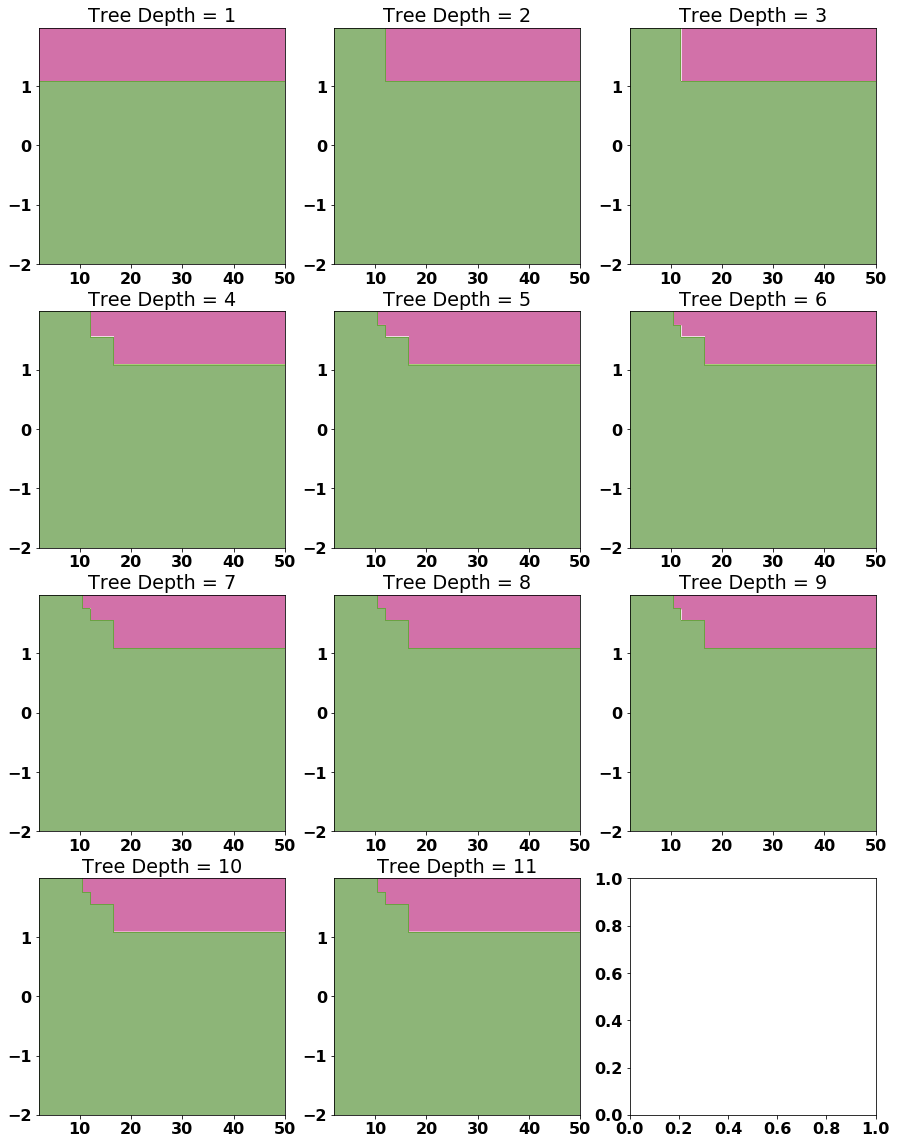

In [56]:
# Learn decision trees with different depths
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc


d_values = np.arange(1, 12, dtype='int')
models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()

for d in d_values:
    models[d] = DecisionTreeClassifier(max_depth = d, min_samples_split=2, min_samples_leaf=0.01233265)
    models[d].fit(X_trn,y_trn)
    y_trn_predicted = models[d].predict(X_trn)
    y_val_predicted = models[d].predict(X_val)
    y_tst_predicted = models[d].predict(X_tst)
    tst_score[d] = models[d].score(X_tst,y_tst)
    va_score[d] = models[d].score(X_val,y_val)

   
    

    print('Learning a decision tree with d = {0}.'.format(d))
# score plot
visualize(models, X_trn, y_trn)


Learning a decision tree with d = 6.


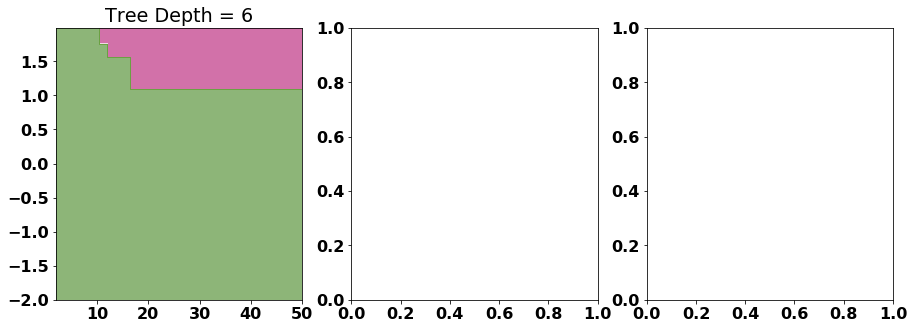

In [57]:
# Learn decision trees with different depths
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc
models = dict()


d = 6
models[d] = DecisionTreeClassifier(max_depth = 6, min_samples_split=2, min_samples_leaf=0.01233265 )
models[d].fit(X_trn,y_trn)
y_trn_predicted = models[d].predict(X_trn)
y_val_predicted = models[d].predict(X_val)
y_tst_predicted = models[d].predict(X_tst)
tst_score[d] = models[d].score(X_tst,y_tst)
va_score[d] = models[d].score(X_val,y_val)

   
    

print('Learning a decision tree with d = {0}.'.format(d))
# score plot
visualize(models, X_trn, y_trn)


In [44]:
y_trn_predicted = models[d].predict(X_trn)
y_val_predicted = models[d].predict(X_val)
y_tst_predicted = models[d].predict(X_tst)
tst_score[d] = models[d].score(X_tst,y_tst)
va_score[d] = models[d].score(X_val,y_val)

KeyError: 1

# Regression model

In [10]:
#Regression model
#Creating data set
df1 = df[(df['FailSeq'] == 1)].copy()
# ********************************
# Machine learning
# Specifying the features and Target

# before creating ML feature, we have to create a more complete data frame, 
#so after training we could compare and rank the FE results and ML results
feature_cols2=['AR', 'sh', 'VM', 'TR']
X_trn1 = df1.loc[:,feature_cols2].copy()  #used for regression
X_trn1.head()



,AR,sh,VM,TR
744,32.3532,0.277972,0.18,1.446336
748,33.4756,0.467657,0.13,1.929442
750,33.4629,0.025598,0.24,1.849404
751,15.2923,0.413494,0.14,0.991767
756,33.4447,0.254198,0.23,1.079130


In [11]:
#Regression model
#Creating data set
df1 = df[(df['FailSeq'] == 1)].copy()
# ********************************
# Machine learning
# Specifying the features and Target

# before creating ML feature, we have to create a more complete data frame, 
#so after training we could compare and rank the FE results and ML results
feature_cols2=['AR', 'sh', 'VM', 'TR']
X_trn1 = df1.loc[:,feature_cols2].copy()  #used for regression
y_trn1 = df1.Max_S_VI.copy()
y_trn2 = df1.Max_S_VI.copy()
# scikit-learn has many tools and utilities for model selection
from sklearn.model_selection import train_test_split
tst_frac = 0.3  # Fraction of examples to sample for the test set
val_frac = 0.1  # Fraction of examples to sample for the validation set

# First, we use train_test_split to partition (X, y) into training and test sets
X_trn1, X_tst1, y_trn1, y_tst1 = train_test_split(X_trn1, y_trn1, test_size=tst_frac, random_state=42)

# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn1, X_val1, y_trn1, y_val1 = train_test_split(X_trn1, y_trn1, test_size=val_frac, random_state=42)
X_trn1.head()

,AR,sh,VM,TR
63406,2.0000,0.150000,0.14,-0.337242
1581,14.5865,0.039866,0.56,1.944107
46964,4.0000,0.100000,0.50,0.301030
31283,9.8715,0.387364,0.26,0.993595
4961,8.2504,0.123532,0.77,1.677209


0.9566934936525658


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


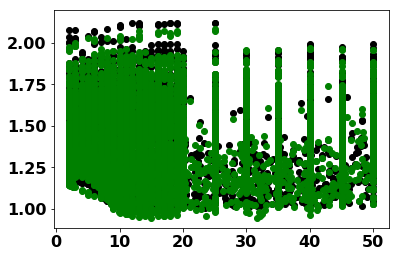

In [12]:
# SVR Support Vector Regression (SVR) using linear and non-linear kernels
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# Fit regression model
# the only model that work better than regression is rbf
svr_rbf = SVR(kernel='rbf', C=1000, gamma='scale').fit(X_trn1, y_trn1)
y_val1_pred = svr_rbf.predict(X_val1)
# lieanr.score=0.77 similar to linear regression, poly.score=-7312490
score = svr_rbf.score(X_val1,y_val1)
Merror = mean_squared_error(y_val1,y_val1_pred)

print(score)
y_pred_rbf_tst = svr_rbf.predict(X_tst1)
plt.scatter(X_tst1.AR, y_tst1,  color='black')
plt.plot(X_tst1.AR, y_pred_rbf_tst, 'og')
plt.show()

In [10]:
min_samples_leafs = np.linspace(1, 8, 8, endpoint=True)
min_samples_splits = min_samples_leafs

d= min_samples_leafs
for d in min_samples_splits:
    s=1/10.00**d
    print(s)

0.1
0.01
0.001
0.0001
1e-05
1e-06
1e-07
1e-08


Learning a decision tree with d = 0.01.
Learning a decision tree with d = 0.0575.
Learning a decision tree with d = 0.105.
Learning a decision tree with d = 0.15250000000000002.
Learning a decision tree with d = 0.2.


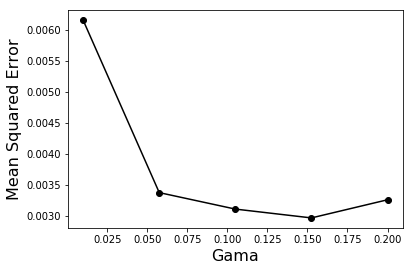

In [11]:
# parameter calibration


# 
min_samples_leafs = np.linspace(0.01, 0.2, 5, endpoint=True)
min_samples_splits = min_samples_leafs


d_values = min_samples_splits
models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()
percision_v = dict()
percision_t = dict()
score = dict()


for d in min_samples_splits:
    models[d] = SVR(kernel='rbf', C=1, gamma=d, epsilon=0.1).fit(X_trn1, y_trn1)
    tst_score[d] = models[d].score(X_tst1,y_tst1)
    # score
    #va_score[d] = models[d].score(X_tst1,y_tst1)
    
    # mean squared error (MSE)
    y_val1_pred = models[d].predict(X_val1)
    va_score[d] = mean_squared_error(y_val1,y_val1_pred)

    print('Learning a decision tree with d = {0}.'.format(d))

    
# score plot
plt.figure()
plt.xlabel('Gama', fontsize=16)
# plt.ylabel('Accuracy', fontsize=16)
plt.ylabel('Mean Squared Error', fontsize=16)

plt.plot(d_values,va_score.values(),  '-ko', label = 'percision for validation data', )



In [13]:
va_score

{0.01: 0.00615396026345953,
 0.0575: 0.0033746786182092124,
 0.105: 0.0031090061534712575,
 0.15250000000000002: 0.002966735175379022,
 0.2: 0.003259285906331163}

Learning a decision tree with d = 1.0.
Learning a decision tree with d = 1000.8.
Learning a decision tree with d = 2000.6.
Learning a decision tree with d = 3000.3999999999996.
Learning a decision tree with d = 4000.2.
Learning a decision tree with d = 5000.0.


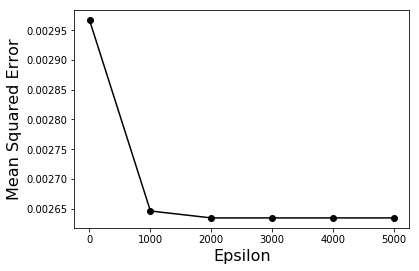

In [23]:
# parameter calibration


# 
min_samples_leafs = np.linspace(1, 5000, 6, endpoint=True)
#min_samples_leafs = np.linspace(0.001, 0.4, 20, endpoint=True)
min_samples_splits = min_samples_leafs


d_values = min_samples_splits
models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()
percision_v = dict()
percision_t = dict()
score = dict()


for d in min_samples_splits:
    models[d] = SVR(kernel='rbf', C=d, gamma=0.1525, epsilon=0.1).fit(X_trn1, y_trn1)
    tst_score[d] = models[d].score(X_tst1,y_tst1)
    # score or R^2
    #va_score[d] = models[d].score(X_tst1,y_tst1)
        # mean squared error (MSE)
    y_val1_pred = models[d].predict(X_val1)
    va_score[d] = mean_squared_error(y_val1,y_val1_pred)
    print('Learning a decision tree with d = {0}.'.format(d))


    
# score plot
plt.figure()
plt.xlabel('Epsilon', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
#
plt.ylabel('Mean Squared Error', fontsize=16)


plt.plot(d_values,va_score.values(),  '-ko', label = 'percision for validation data', )


In [25]:
min_samples_leafs = np.linspace(1, 3, 3, endpoint=True)
#min_samples_leafs = np.linspace(0.001, 0.4, 20, endpoint=True)
min_samples_splits = min_samples_leafs
d_values = min_samples_splits
d_values

array([1., 2., 3.])

In [30]:
1/10**2

100.0

Learning a decision tree with d = 0.01.
Learning a decision tree with d = 0.04.
Learning a decision tree with d = 0.07.
Learning a decision tree with d = 0.1.


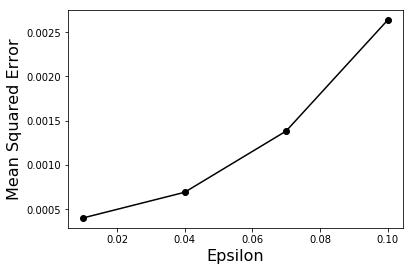

In [10]:
min_samples_leafs = np.linspace(0.01, 0.1, 4, endpoint=True)
#min_samples_leafs = np.linspace(0.001, 0.4, 20, endpoint=True)
min_samples_splits = min_samples_leafs
d_values = min_samples_splits
d_values


models = dict()
trnErr = dict()
va_score = dict()
tst_score = dict()
roc_auc = dict()
percision_v = dict()
percision_t = dict()
score = dict()


for d in min_samples_splits:
    models[d] = SVR(kernel='rbf', C=2000, gamma=0.1525, epsilon=d).fit(X_trn1, y_trn1)
    tst_score[d] = models[d].score(X_tst1,y_tst1)
    # score or R^2
    #va_score[d] = models[d].score(X_tst1,y_tst1)
        # mean squared error (MSE)
    y_val1_pred = models[d].predict(X_val1)
    va_score[d] = mean_squared_error(y_val1,y_val1_pred)
    print('Learning a decision tree with d = {0}.'.format(d))


    
# score plot
plt.figure()
plt.xlabel('Epsilon', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
#
plt.ylabel('Mean Squared Error', fontsize=16)


plt.plot(d_values,va_score.values(),  '-ko', label = 'percision for validation data', )

In [13]:
mo=models[0.01]

# final regression model

# first put epsilon 001 then run the final on epsilion 0.0005 to get the accurate results


import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# final regression model

# 
min_samples_leafs = np.linspace(1, 4000, 1, endpoint=True)
min_samples_splits = min_samples_leafs


d=1

models= SVR(kernel='rbf',  C=2000, gamma=0.1525, epsilon=0.001).fit(X_trn1, y_trn1)
tst_score = models.score(X_tst1,y_tst1)
    # score or R^2
    #va_score[d] = models[d].score(X_tst1,y_tst1)
        # mean squared error (MSE)
y_tst1_pred = models.predict(X_tst1)
y_trn1_pred = models.predict(X_trn1)
va_score = mean_squared_error(y_tst1,y_tst1_pred)


va_score

In [14]:
# load the model from disk
import pickle
filename = 'best.sav'
models = pickle.load(open(filename, 'rb'))
y_tst1_pred = models.predict(X_tst1)
y_trn1_pred = models.predict(X_trn1)
va_score = mean_squared_error(y_tst1,y_tst1_pred)
va_score

0.0004721981532605177

In [15]:
df_tst1= X_tst1.copy()
df_tst1['Max_S_VI']=y_tst1.copy()
df_trn1= X_trn1.copy()
df_trn1['Max_S_VI']=y_trn1.copy()
df_tst1.head()


,AR,sh,VM,TR,Max_S_VI
58121,10.0000,0.300000,0.30,-0.958607,1.308650
55603,4.0000,0.500000,0.60,-0.148742,1.569505
5254,6.1062,0.466234,0.25,1.567882,1.149949
45880,2.0000,0.200000,0.10,1.505150,1.203169
55694,4.0000,0.100000,0.80,-0.214670,1.673885


In [16]:


# reset the index
df_trn1 = df_trn1.reset_index(drop=True)
df_tst1 = df_tst1.reset_index(drop=True)

#
df_trn1['SVR']=y_trn1_pred.copy()
df_tst1['SVR']=y_tst1_pred.copy()
#
df_trn1['R_FE']= df_trn1.Max_S_VI.rank(axis=0, method='max',ascending=1)
df_trn1['R_SVR']= df_trn1.SVR.rank(axis=0, method='max')

#
df_tst1['R_FE']= df_tst1.Max_S_VI.rank(axis=0, method='max',ascending=1)
df_tst1['R_SVR']= df_tst1.SVR.rank(axis=0, method='max')

df_tst1.head()



,AR,sh,VM,TR,Max_S_VI,SVR,R_FE,R_SVR
0,10.0000,0.300000,0.30,-0.958607,1.308650,1.317506,3986.0,4119.0
1,4.0000,0.500000,0.60,-0.148742,1.569505,1.576574,5651.0,5685.0
2,6.1062,0.466234,0.25,1.567882,1.149949,1.130428,972.0,834.0
3,2.0000,0.200000,0.10,1.505150,1.203169,1.195578,2173.0,2012.0
4,4.0000,0.100000,0.80,-0.214670,1.673885,1.681601,6272.0,6311.0


Text(0.5, 1.0, 'Test data')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


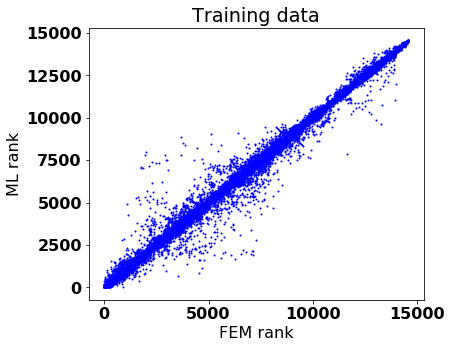

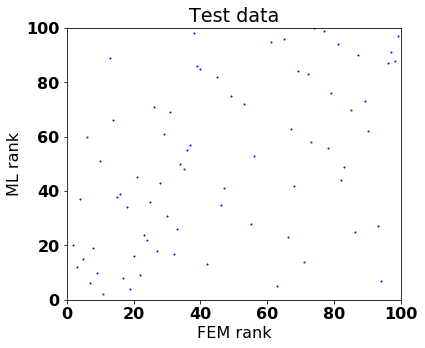

In [17]:
# training ranking plot
plt.figure()
plt.plot(df_trn1.R_FE,df_trn1.R_SVR, 'bo', markersize=1)


plt.xlabel('FEM rank')
plt.ylabel('ML rank')
plt.title('Training data')
#plt.axis((0,100,0,100))
fig = plt.gcf()
fig.set_size_inches(6, 5)

# test ranking plot
plt.figure()
#plt.plot(df_tst.R_FE,df_tst.R_LogR,'ro')
#plt.plot(df_tst.R_FE,df_tst.R_NaB, 'bo')
#plt.plot(df_tst.R_FE,df_tst.R_RF, 'go')
#plt.plot(df_tst.R_FE,df_tst.R_GB, 'yo')
#plt.plot(df_tst.R_FE,df_tst.R_PN, 'yo')
#plt.plot(df_tst.R_FE,df_tst.R_SVM, 'go')
plt.plot(df_tst1.R_FE,df_tst1.R_SVR, 'bo', markersize=1)
plt.axis((0,100,0,100))
fig = plt.gcf()
fig.set_size_inches(6, 5)


plt.xlabel('FEM rank')
plt.ylabel('ML rank')
plt.title('Test data')

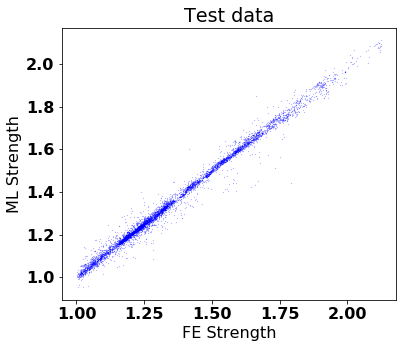

In [18]:
plt.figure()
plt.plot(y_tst1,y_tst1_pred,'bo', markersize=0.1)
plt.xlabel('FE Strength')
plt.ylabel('ML Strength')
plt.title('Test data')
#plt.axis((0.99,1.1,0.99,1.2))
#plt.axis((0.99,2.2,0.99,2.2))
#plt.figure()
#plt.plot(y_trn1,y_trn1_pred,'ro')
#plt.xlabel('FEM rank')
#plt.ylabel('ML rank')
#plt.title('Training data')
fig = plt.gcf()
fig.set_size_inches(6, 5)



# TOP geometries in ML and FE in the test data set




In [18]:
df_tst1['R_FE']= df_tst1.Max_S_VI.rank(axis=0, method='max',ascending=0)
#df_tst1['R_SVR']= df_tst1.SVR.rank(axis=0, method='max',ascending=0)
TOP_FE = df_tst1[(df_tst1['R_FE'] >= 0)]
#TOP_SVR = df_tst1[ (df_tst1['R_SVR'] >= 0) ]
TOP_FE.to_csv('TOP_FEtst.csv')
#TOP_SVR.to_csv('TOP_SVR.csv')



In [19]:
df_trn1['R_FE']= df_trn1.Max_S_VI.rank(axis=0, method='max',ascending=0)
#df_tst1['R_SVR']= df_tst1.SVR.rank(axis=0, method='max',ascending=0)
TOP_FE = df_trn1[(df_trn1['R_FE'] >= 0)]
#TOP_SVR = df_tst1[ (df_tst1['R_SVR'] >= 0) ]
TOP_FE.to_csv('TOP_FEtrn.csv')
#TOP_SVR.to_csv('TOP_SVR.csv')

# creating 1 million data set 

1    82870
0    17130
Name: FailSeq, dtype: int64
1    82870
Name: FailSeq, dtype: int64
          AR        sh        VM        TR  Max_S_VI
0  33.462937  0.057851  0.587669 -1.151629  1.585439
3  28.558832  0.481007  0.093594 -1.734172  1.862818
4   4.593456  0.248273  0.225313  0.465325  1.296277
5   8.630030  0.102092  0.395358  0.325336  1.413465
6  30.202762  0.449496  0.742282  1.021078  1.083426


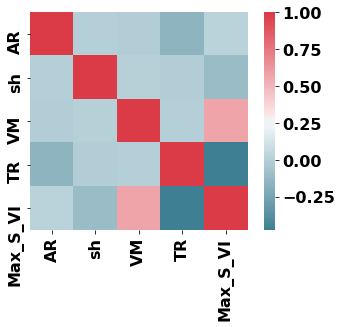

In [22]:
#creating 1 million data set 
#AR	sh	VM	TR
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np                       # For all our math needs
n = 100000                                  # Number of data points
Million = pd.DataFrame()
# AR= 2 to 50
Million ['AR'] = np.random.uniform(2, 50, n)      # Training examples, in one dimension
# s= 0.01 to 0.5
Million ['sh']= np.random.uniform(0.01, 0.49, n)        # Random Gaussian noise
# vm= 0.01 to 0.99
Million ['VM']= np.random.uniform(0.01, 0.99, n)                      
# log(TR)= -2 to 2
Million ['TR']= np.random.uniform(-2, 2, n)
# decision tree with depth 5
Dtree = DecisionTreeClassifier(max_depth = 6, min_samples_split=2, min_samples_leaf=0.01233265).fit(X_trn,y_trn)
# add a column to million data set
Million ['FailSeq'] = Dtree.predict(Million[['AR','TR']])
print(Million.FailSeq.value_counts())
Million = Million[ (Million['FailSeq'] > 0)]
print(Million.FailSeq.value_counts())
Million ['Max_S_VI'] =  models.predict(Million[['AR', 'sh','VM', 'TR']])
Million.drop(['FailSeq'],axis=1, inplace=True)
Million = Million[ (Million['Max_S_VI'] < 2.4) & (Million['Max_S_VI'] > 0.76)]
print(Million.head())
# heat map
import seaborn as sns
corr = Million.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


In [23]:
Million.head()
Million.to_csv('Million.csv')

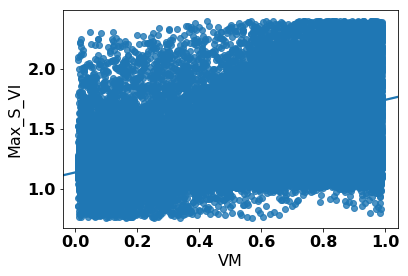

In [30]:
import seaborn as sns
sns.regplot(x='VM', y='Max_S_VI', data=Million)

In [40]:
Million.plot = Million.TR/Million.VM
#df.Max_S_VI = (1/df.Max_S_VI)
Million.plot

0        -1.959656
3       -18.528759
4         2.065236
5         0.822888
6         1.375593
9        -1.980783
10        3.473853
11      -47.877153
12       -2.954264
14        1.214153
15       -7.141057
16       -8.470796
17        0.451556
18       -6.666616
19       -0.409183
20       -1.690447
21       -2.175979
22       -0.020001
23       -3.405564
24        1.888206
25       -4.776088
26       -4.713916
28       -1.200727
30       -2.312348
31        1.291077
33        2.335080
35       -3.954516
39        1.241980
40       -9.989341
42       -1.687281
           ...    
99958    -0.604769
99959     0.277521
99960    -6.840475
99961    -7.427827
99963     0.553541
99967     1.312419
99968    11.123285
99970    -7.477285
99972    11.167124
99973    -1.941056
99975    -2.965155
99976     3.890659
99978     3.879899
99979     1.517332
99980    -1.735164
99983     4.482598
99984     0.895056
99986     6.600214
99987    -0.612330
99988     0.359592
99989     1.674529
99990     0.

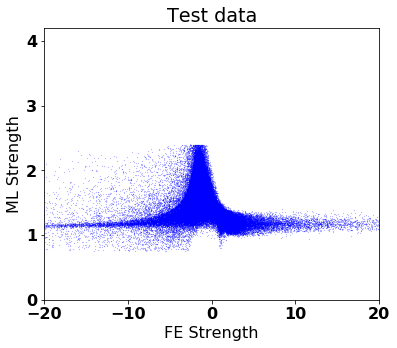

In [43]:
plt.figure()
plt.plot(Million.plot,Million.Max_S_VI,'bo', markersize=0.1)
plt.xlabel('FE Strength')
plt.ylabel('ML Strength')
plt.title('Test data')
plt.axis((-20,20,0,4.2))
#plt.axis((0.99,2.2,0.99,2.2))
#plt.figure()
#plt.plot(y_trn1,y_trn1_pred,'ro')
#plt.xlabel('FEM rank')
#plt.ylabel('ML rank')
#plt.title('Training data')
fig = plt.gcf()
fig.set_size_inches(6, 5)

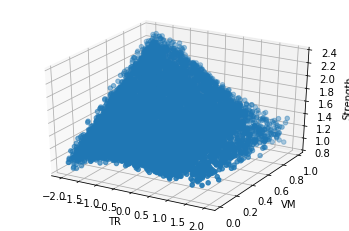

In [36]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(Million.TR, Million['VM'], Million['Max_S_VI'])
threedee.set_xlabel('TR')
threedee.set_ylabel('VM')
threedee.set_zlabel('Strength')
plt.show()

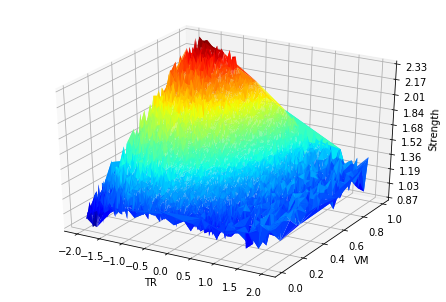

In [37]:
# 3D Plot using `.trisurf()`:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf( Million.TR,Million.VM, Million.Max_S_VI, cmap=cm.jet, linewidth=0.1)
ax.set_xlabel('TR')
ax.set_ylabel('VM')
ax.set_zlabel('Strength')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()

In [ ]:
# first investigate the feature range and median for top 2% strength and then create a new 